# Car Evaluation
>## Business Problem:
 
To classify a car as acceptable , unacceptable , good or very good based on its price , characterstics and maintenance cost.
> ## Description:

- **Model concept structure:**
```
 Price                    overall price
 Maintenance Cost         price of the maintenance
 Number of Doors          number of doors
 Capacity                 capacity in terms of persons to carry
 Size of Luggage boot     the size of luggage boot
 safety                   estimated safety of the car
```

### 1 Data Specifications and Cleaning


#### 1.1 Importing basic Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\$ubhajit\Downloads\car.csv',header=None)

In [3]:
# Original dataset doesnt have name so putting them manually
df.columns = ['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'safety', 'Decision']

In [4]:
df.head()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.shape

(1728, 7)

#### 1.2 Data Insights

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 1728 non-null   object
 1   Maintenance Cost      1728 non-null   object
 2   Number of Doors       1728 non-null   object
 3   Capacity              1728 non-null   object
 4   Size of Luggage Boot  1728 non-null   object
 5   safety                1728 non-null   object
 6   Decision              1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.describe(include='all').T

,count,unique,top,freq
Price,1728,4,med,432
Maintenance Cost,1728,4,med,432
Number of Doors,1728,4,2,432
Capacity,1728,3,more,576
Size of Luggage Boot,1728,3,med,576
safety,1728,3,med,576
Decision,1728,4,unacc,1210


In [8]:
for i in df.columns : 
    print(df[i].value_counts())

med      432
low      432
vhigh    432
high     432
Name: Price, dtype: int64
med      432
low      432
vhigh    432
high     432
Name: Maintenance Cost, dtype: int64
2        432
4        432
3        432
5more    432
Name: Number of Doors, dtype: int64
more    576
2       576
4       576
Name: Capacity, dtype: int64
med      576
big      576
small    576
Name: Size of Luggage Boot, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: Decision, dtype: int64


**Analysis :** Data is balanced except the target feature i.e Decision which is **imblanced** and **skewed**

## 2 Exploratory Data Analysis

### 2.1 Uni-Variate Analysis


#### - PIE CHARTS

In [9]:
df.Decision.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Decision, dtype: int64

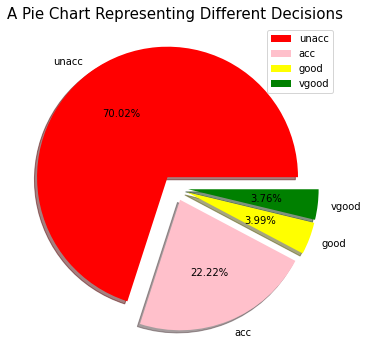

In [10]:
labels = ['unacc','acc','good','vgood']

colors = ['red','pink','yellow','green']

size = [1210,384,69,65]

explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (6,6)

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")

plt.title('A Pie Chart Representing Different Decisions', fontsize = 15)
plt.axis('off')
plt.legend()

plt.show()

**Analysis :** Most of the cars can be unaccountable due to having a small dataset

In [11]:
df.Price.value_counts()

med      432
low      432
vhigh    432
high     432
Name: Price, dtype: int64

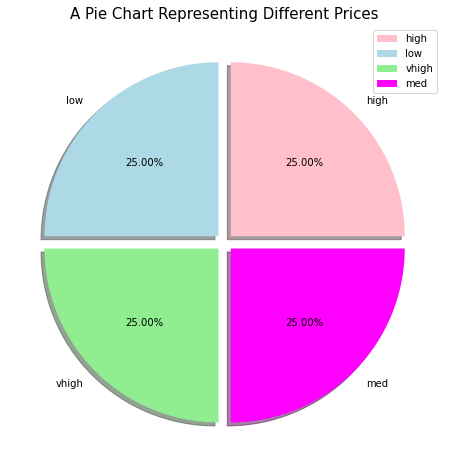

In [12]:
labels = ['high','low','vhigh','med']

colors = ['pink', 'lightblue', 'lightgreen', 'magenta']

size = [432,432,432,432]

explode = [0.05, 0.05, 0.05, 0.05]

plt.rcParams['figure.figsize'] = (8,8)

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")

plt.title('A Pie Chart Representing Different Prices', fontsize = 15)
plt.axis('off')
plt.legend()

plt.show()

It's clearly visible that since all other attributes are also equally balanced , all the univariate visualisation would be same and of equally balanced classes.

## 2.2 Bi-Variate Analysis

### - STACKED BAR GRAPH

In [13]:
pd.crosstab(df.Price , df.Decision)

Decision,acc,good,unacc,vgood
Price,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


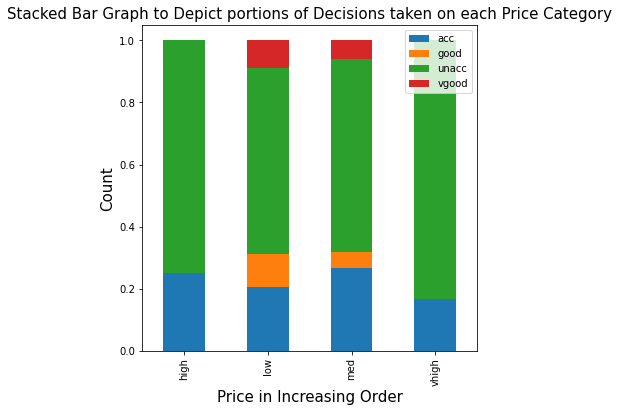

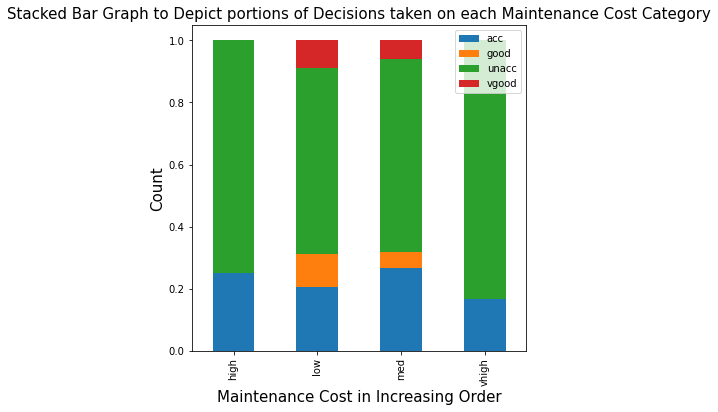

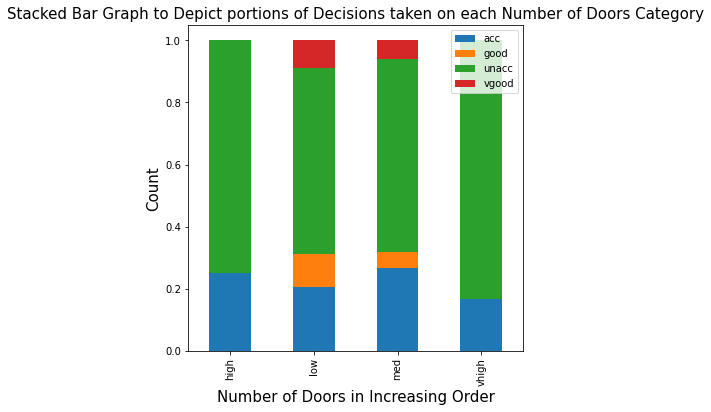

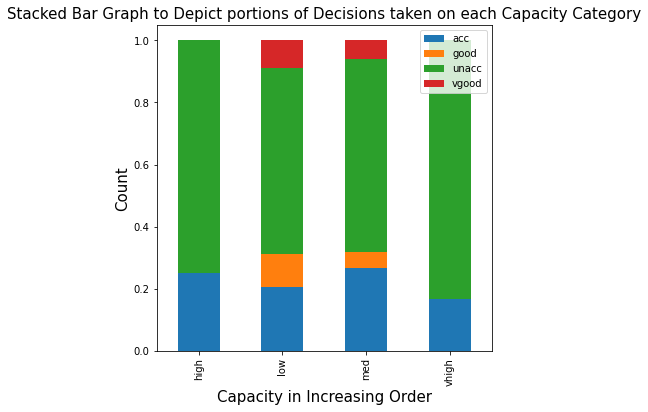

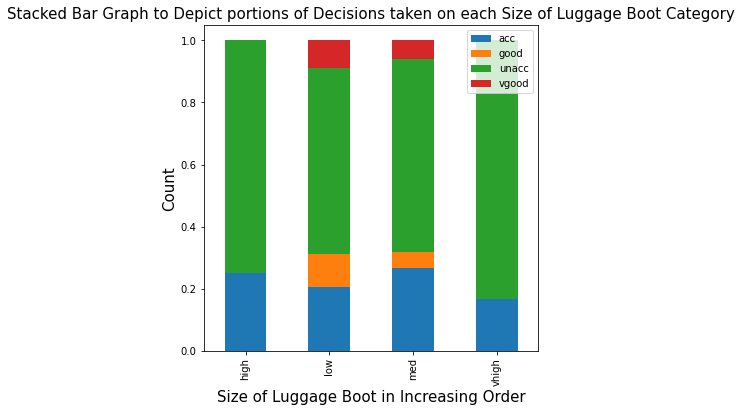

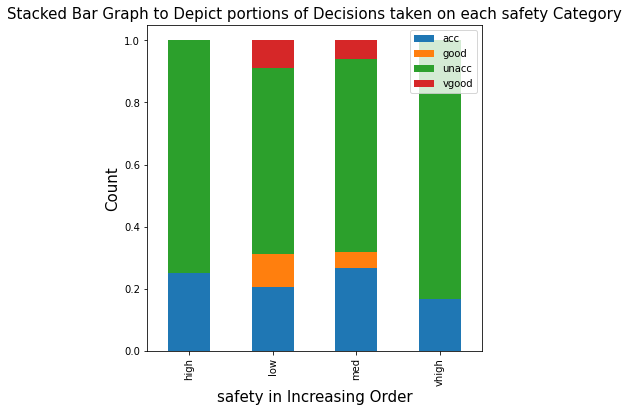

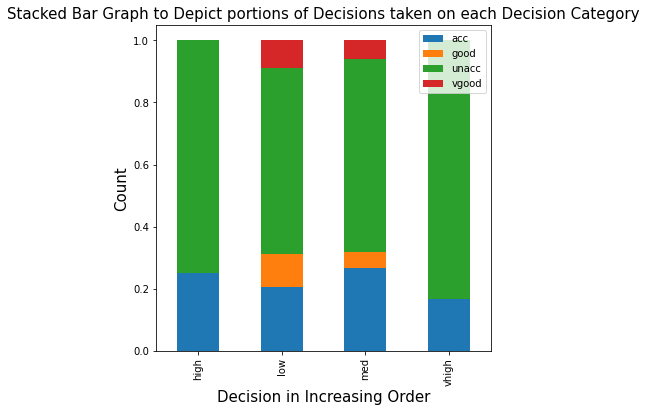

In [14]:
for i in df.columns : 
    ctab = pd.crosstab(df.Price , df.Decision)
    ctab.div(ctab.sum(1).astype(float), axis = 0).plot(kind='bar' , stacked=True , figsize=(6,6))
    plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each {} Category'.format(i), fontsize = 15)
    plt.xlabel('{} in Increasing Order'.format(i), fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.legend()
    plt.show()

## 3 Data Processing

### 3.1 Label encoding

**Convert all the categorical attributes to numerical ones using LabelEncoder or Manually Hard Code all the categorical attributes as per your choice**

In [15]:

df['Size of Luggage Boot'].replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)
df.Decision.replace(('unacc', 'acc', 'good', 'vgood'), (0, 1, 2, 3), inplace = True)
df['safety'].replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)
df['Price'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
df['Maintenance Cost'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
df['Number of Doors'].replace('5more', 5, inplace = True)
df['Capacity'].replace('more', 5, inplace = True)

#OR

#from sklearn import preprocessing
#le=preprocessing.LabelEncoder()
#df= le.fit_transform(df)

df['Size of Luggage Boot'].unique()

array([0, 1, 2], dtype=int64)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 1728 non-null   int64 
 1   Maintenance Cost      1728 non-null   int64 
 2   Number of Doors       1728 non-null   object
 3   Capacity              1728 non-null   object
 4   Size of Luggage Boot  1728 non-null   int64 
 5   safety                1728 non-null   int64 
 6   Decision              1728 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 94.6+ KB


**Convert all attributes to int**

In [17]:
df["Number of Doors"]=df["Number of Doors"].astype('int64',copy=False)
df.Capacity=df.Capacity.astype('int64')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Price                 1728 non-null   int64
 1   Maintenance Cost      1728 non-null   int64
 2   Number of Doors       1728 non-null   int64
 3   Capacity              1728 non-null   int64
 4   Size of Luggage Boot  1728 non-null   int64
 5   safety                1728 non-null   int64
 6   Decision              1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


### Violin Plots and Box plots

**Make Violin Plots between all attributes and Decision**

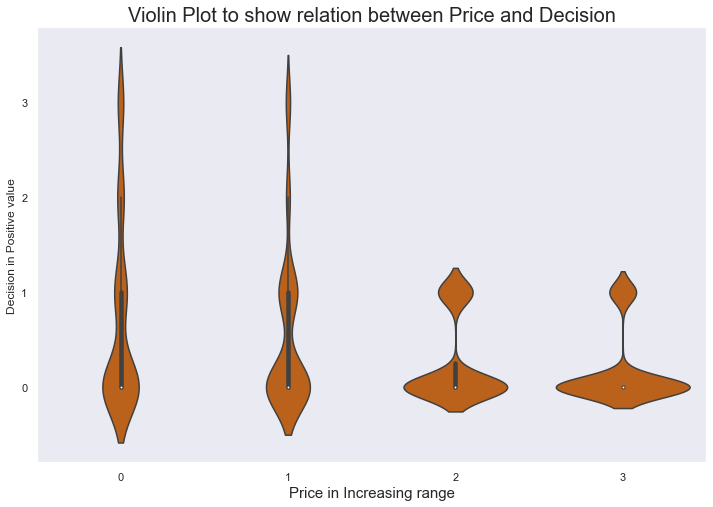

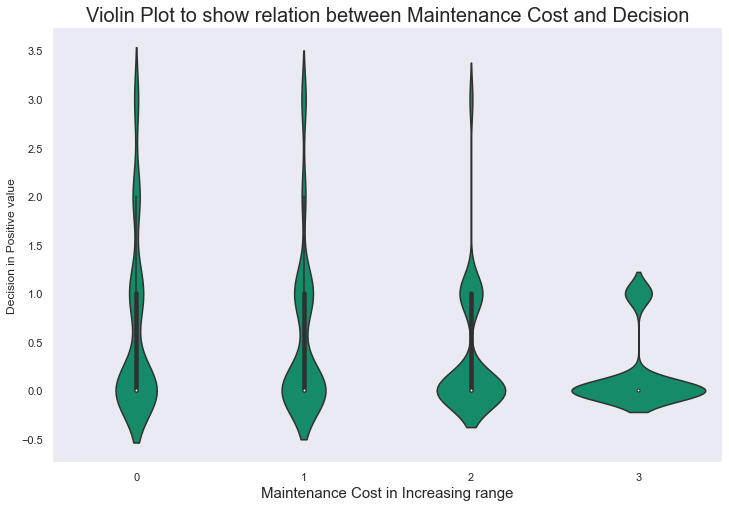

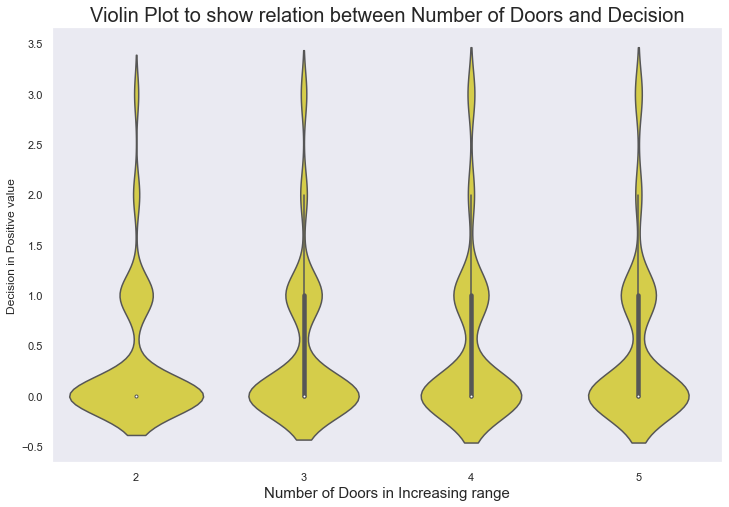

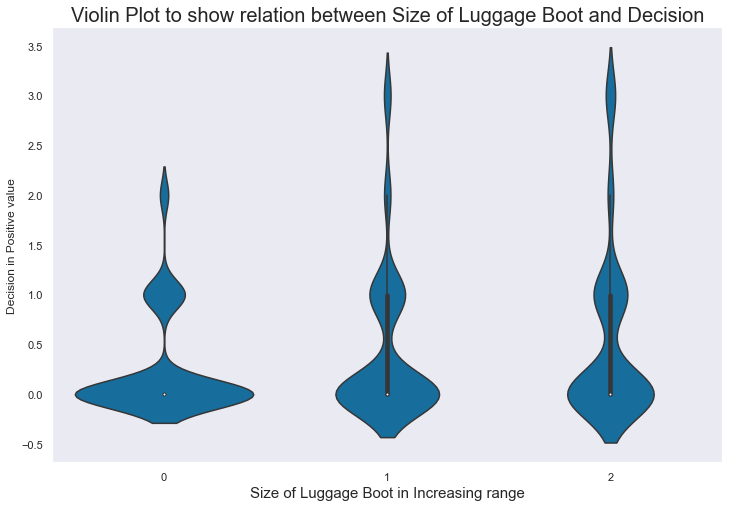

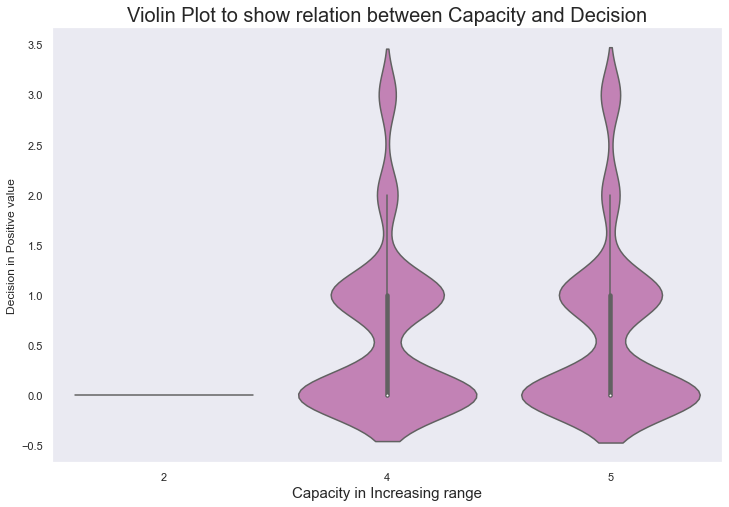

In [19]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)

plt.rcParams['figure.figsize'] = (12, 8)

color = ['r','g','y','b','m']

cols = ['Price' , 'Maintenance Cost' , 'Number of Doors' , 'Size of Luggage Boot','Capacity']

for c,i in zip(color,cols) :
    ax = sns.violinplot(x = df[i], y = df['Decision'], color = c)
    ax.set_title('Violin Plot to show relation between {} and Decision'.format(i), fontsize = 20)
    ax.set_xlabel('{} in Increasing range'.format(i), fontsize = 15)
    ax.set_ylabel('Decision in Positive value')
    plt.show()

**PLOT BOXPLOT**

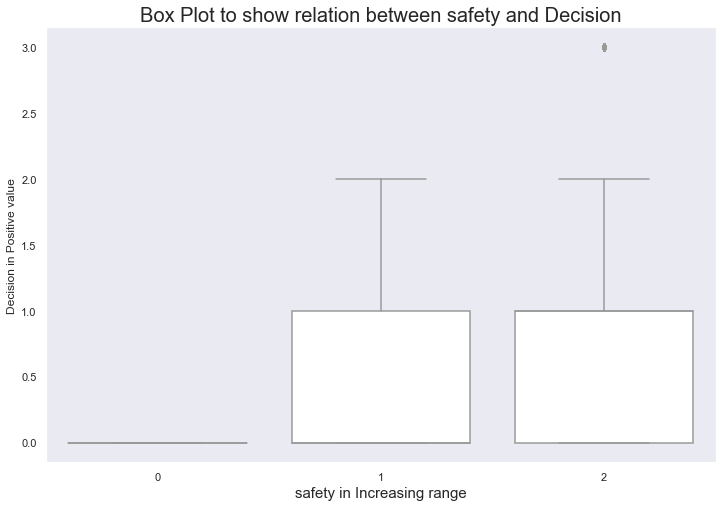

In [20]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.boxplot(x = df['safety'], y = df['Decision'], color = 'w')
ax.set_title('Box Plot to show relation between safety and Decision', fontsize = 20)
ax.set_xlabel('safety in Increasing range', fontsize = 15)
ax.set_ylabel('Decision in Positive value')
plt.show()

### 3.2 CORREALTION MATRIX
**Make a Correlation Matrix using corr() and make it visually aesthetic using sns.heatmap**

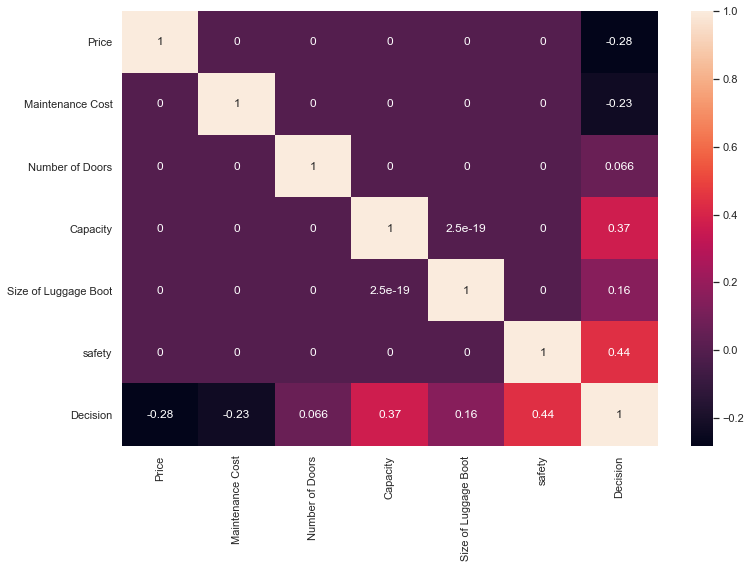

In [21]:
sns.heatmap(df.corr(),annot=True)

Its clearly visible since there is no proper co relation between any of the attributes except *decision* prompts that there is no use to do *multi variate analysis*. Now its time to make a model based on the information. For that split the data into train and test set and then make a model on it.

## 4 Data Split into Train and Test Set
**Split the data into dependent and independent variables and print their shapes**

In [22]:
X=df[df.columns[:-1]]
y=df['Decision']

In [23]:
X

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety
0,3,3,2,2,0,0
1,3,3,2,2,0,1
2,3,3,2,2,0,2
3,3,3,2,2,1,0
4,3,3,2,2,1,1
...,...,...,...,...,...,...
1723,0,0,5,5,1,1
1724,0,0,5,5,1,2
1725,0,0,5,5,2,0
1726,0,0,5,5,2,1


In [24]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: Decision, Length: 1728, dtype: int64

**Split the data into train and test sets with test size=0.15, random state = 0 and print their shapes**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)

Shape of x_train:  (1468, 6)
Shape of y_train:  (1468,)
shape of x_test:  (260, 6)
shape of y_test:  (260,)


## 5 Creating a model
### 5.1 KNN Classifier
**Make a KNN classifier model and print train and test accuracy along with confusion matrix**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy:  0.9822888283378747
Testing Accuracy:  0.9461538461538461
[[180   4   0   0]
 [  4  52   3   0]
 [  0   2   9   0]
 [  0   1   0   5]]


**Does high accuracy mean that this model is a good predictor?**

Even a high accuracy doesnt necesssarily imply that its a great model especially with Imbalanced Multiclass Classification , Accuracy might give misleading results as model might be predicting everything as unacc in this case and since majority of the elements actually give the value unacc , accuracy is bound to be high but this does not mean the model is good predictor. So you have to analyse it using other measures like F1 scores , Precision , Recall.

**Make a Classification Report to properly assess the models performance**

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.88      0.88      0.88        59
           2       0.75      0.82      0.78        11
           3       1.00      0.83      0.91         6

    accuracy                           0.95       260
   macro avg       0.90      0.88      0.89       260
weighted avg       0.95      0.95      0.95       260



**KNN HYPERTUNING**

Now try to gain more accuracy by hypertuning the parameter Number of Neighbors.

We have to find the best hyperparameter by using the following code below.

**Use for loop to give values to n_neighbors from 2 to 30 and calculate average cross validation score for each of them**

In [28]:
from sklearn.model_selection import cross_val_score

avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,n_jobs=-1,cv=5,scoring='accuracy')
    avg_score.append(score.mean())


**Plot the average scores of all k's**

Text(0, 0.5, 'accuracy')

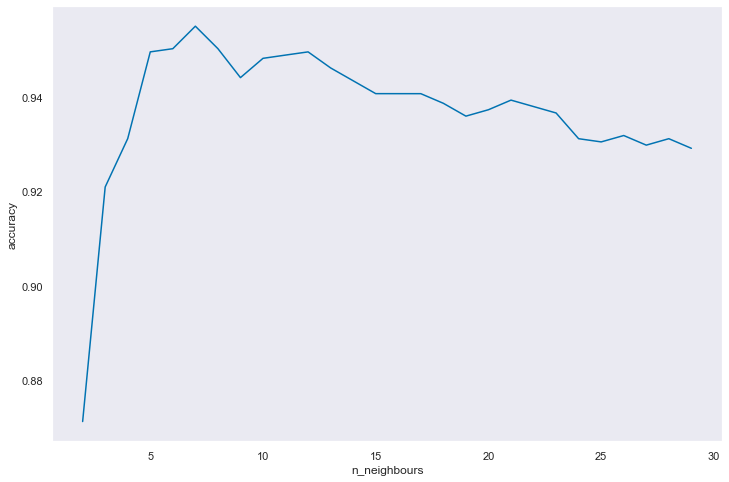

In [29]:
plt.figure(figsize=(12,8))

plt.plot(range(2,30),avg_score)

plt.xlabel("n_neighbours")
plt.ylabel("accuracy")

In [30]:
avg_score

[0.8712799795686192,
 0.9209769914791857,
 0.9312298298158854,
 0.9496041419980962,
 0.9502774488635044,
 0.9550463188688445,
 0.9502844141069395,
 0.9441480346404774,
 0.9482366325369738,
 0.9489238698892526,
 0.9496018202502844,
 0.9462004597060668,
 0.9434770495228808,
 0.9407536393396949,
 0.9407489958440716,
 0.9407466740962598,
 0.938705857769729,
 0.9359870910821666,
 0.937345313552042,
 0.939381486382949,
 0.9380209421652621,
 0.9366557544519514,
 0.9312066123377679,
 0.9305286619767361,
 0.9318799192031761,
 0.9298437463722691,
 0.9312089340855797,
 0.9291704395068608]

k=6 has highest accuracy of 0.9550463188688445 followed closely by k=5 having accuracy of 0.9502774488635044 so lets take k=5 and k=6 for consideration.

**Calculate Accuracy and F1 score for both the values of n_neighbors**

In [31]:
knn_5 = KNeighborsClassifier(n_jobs=-1 , n_neighbors=5)
knn_5.fit(X_train,y_train)
print(classification_report(y_test,knn_5.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.88      0.88      0.88        59
           2       0.75      0.82      0.78        11
           3       1.00      0.83      0.91         6

    accuracy                           0.95       260
   macro avg       0.90      0.88      0.89       260
weighted avg       0.95      0.95      0.95       260



In [32]:
knn_6 = KNeighborsClassifier(n_jobs=-1 , n_neighbors=6)
knn_6.fit(X_train,y_train)
print(classification_report(y_test,knn_6.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       184
           1       0.90      0.90      0.90        59
           2       0.78      0.64      0.70        11
           3       1.00      0.83      0.91         6

    accuracy                           0.95       260
   macro avg       0.91      0.84      0.87       260
weighted avg       0.95      0.95      0.95       260



They only have a small difference in accuracy but the difference is huge in F1-score and recall in favor of k=5 so our best model is with n_neighbors=5

We will analyse both the models and choose the best one and write their characterstics here in the blank spaces :

- **Optimised KNN model :n_neighbors = 5**
- **Accuracy ~ 95.2 %**
- **F1 Score ~ 89 %**

This will further clear your understanding that better accuracy doesnt necessarily mean better F1 score or better model. One has to analyse everything before finalising a model

### 5.2 Random Forest

**Make a Random forest Classifier and print the Accuracy and F1 score**

In [33]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc=RandomForestClassifier(n_jobs=-1,random_state=51)
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(f1_score(y_test,rfc.predict(X_test),average='macro'))

0.9576923076923077
0.8294809014219278


#### Random Forest HyperTuning : Grid Search

**Do a GridSearch and print the best hyperparameters for this random forest classifier**

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                    

In [35]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'max_leaf_nodes': None}
0.987051532941944


**Print the Accuracy , Precision , Recall and F1 Score for the optimised Random forest model and compare with previous models**

In [36]:
rf_optimised_model = grid.best_estimator_

y_pred=rf_optimised_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       184
           1       0.95      0.92      0.93        59
           2       0.71      0.91      0.80        11
           3       1.00      0.83      0.91         6

    accuracy                           0.97       260
   macro avg       0.91      0.91      0.91       260
weighted avg       0.97      0.97      0.97       260



### 6 Conclusion

Random Forest clubbed with GridSearch hypertuning gives the best model with an accuracy of 97 % and F1 score of 91 %.